In [1]:
import pandas as pd
import numpy as np

In [2]:
credit = pd.read_csv('German Credit Data.csv')
credit.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [3]:
credit.shape

(1000, 14)

In [4]:
credit.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [5]:
for col in credit.select_dtypes('object').columns:
    print(credit[col].unique())

['A11' 'A12' 'A14' 'A13']
['A34' 'A32' 'A33' 'A30' 'A31']
['A65' 'A61' 'A63' 'A64' 'A62']
['A75' 'A73' 'A74' 'A71' 'A72']
['A93' 'A92' 'A91' 'A94']
['A143' 'A141' 'A142']
['A173' 'A172' 'A174' 'A171']


In [6]:
y = credit['status']

In [7]:
from sklearn.preprocessing import OneHotEncoder

We will use OneHotEncoder to encode all the categorical columns

In [8]:
encoder = OneHotEncoder()

In [9]:
final_df = credit.select_dtypes('int64')
final_df = final_df.drop(['status'], axis = 1)
final_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits
0,6,1169,4,4,67,2
1,48,5951,2,2,22,1
2,12,2096,2,3,49,1
3,42,7882,2,4,45,1
4,24,4870,3,4,53,2


In [10]:
for col in list(credit.select_dtypes('object').columns):
    df = pd.DataFrame(encoder.fit_transform(credit[[col]]).toarray())
    final_df = pd.merge(final_df, df, left_index = True, right_index = True)

In [11]:
final_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits,0_x,1_x,2_x,3_x,...,1_x,2_x,3_x,0_y,1_y,2_y,0,1,2,3_y
0,6,1169,4,4,67,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
result = pd.get_dummies(credit)
cols = list(result.columns)
cols.remove('status')
final_df.columns = cols
final_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A141,inst_plans_A142,inst_plans_A143,job_A171,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import plot_tree

In [14]:
X = final_df.copy()

In [15]:
X.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A141,inst_plans_A142,inst_plans_A143,job_A171,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,48,5951,2,2,22,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,12,2096,2,3,49,1,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,42,7882,2,4,45,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24,4870,3,4,53,2,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: status, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
DecisionTree = DecisionTreeClassifier()

We will build a decision tree first without param specifications

In [19]:
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = DecisionTree.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.705

In [22]:
GS = GridSearchCV(
    estimator = DecisionTree,
    param_grid  = {'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(2,10 + 1))},
    scoring = 'roc_auc',
    cv = 10,
    refit = 'roc_auc'
)

In [23]:
GS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit='roc_auc', scoring='roc_auc')

In [24]:
GS.best_score_

0.7066734036796537

In [25]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 5}

We got a best fit roc_auc score of 1.0 with params gini for splitting criteria and 5 as max_depth of tree

In [26]:
DecisionTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)

In [27]:
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [28]:
metrics.accuracy_score(y_test, y_pred)

0.74

Accuracy score of 74% is obtained

In [29]:
import matplotlib.pyplot as plt

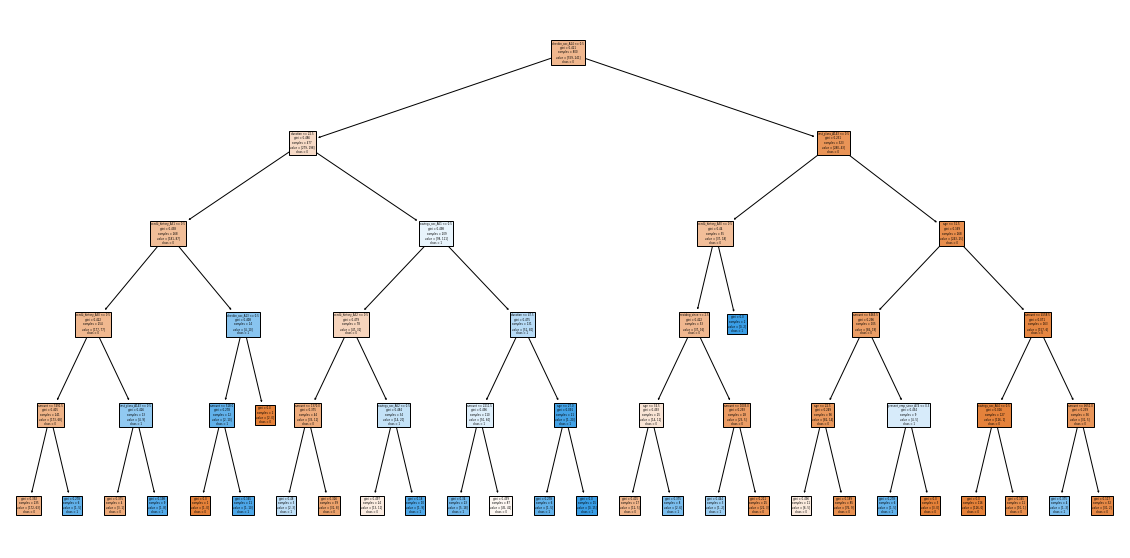

In [30]:
fn = final_df.columns
cn = ['0', '1']
fig = plt.figure(figsize = (20,10))
plot_tree(DecisionTree, feature_names = fn, class_names = cn, filled = True)
plt.show(fig)

In [31]:
from sklearn.tree import export_graphviz
import graphviz

AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

In [ ]:
dot = export_graphviz(DecisionTree, feature_names = fn, class_names = cn, filled = True)
graph = graphviz.Source(dot)

In [ ]:
graph

In [32]:
from sklearn.tree import export_text

In [34]:
print(export_text(DecisionTree))

|--- feature_9 <= 0.50
|   |--- feature_0 <= 22.50
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_1 <= 7491.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  7491.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_10 >  0.50
|   |   |   |   |--- feature_31 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_31 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_11 >  0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_1 <= 518.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  518.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  22.50
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- feature_1 <= 1370.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  1370.00
|   |   |   |   |   |--- class: 0
|   |   |   |--